In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import analyze_utils

save_dir = '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3'

r, all_losses = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, include_losses=True, save_file='r.pkl')

calling


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 280/291 [00:16<00:00, 14.97it/s]

skipping /home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_19_21_21_obexvmxwjhwt/results.pkl (run still in progress?)
skipping /home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3/Jan_19_21_23_wkefrefdezcv/results.pkl (run still in progress?)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 291/291 [00:17<00:00, 16.62it/s]


In [3]:
top_prompts = (
    r.groupby(['task_name', 'seed', 'checkpoint', 'iprompt_generation_checkpoint'])
).first().reset_index()

In [4]:
len(top_prompts)

289

In [5]:
[c for c in top_prompts.columns if 'acc' in c]

['accum_grad_over_epoch', 'prefix_train_acc']

In [6]:
top_prompts.groupby(['checkpoint', 'iprompt_generation_checkpoint']).mean()['reciprocal_rank']

checkpoint               iprompt_generation_checkpoint
EleutherAI/gpt-j-6B      EleutherAI/gpt-j-6B              0.229066
                         EleutherAI/gpt-neo-1.3B          0.216912
                         EleutherAI/gpt-neo-125M          0.175103
                         EleutherAI/gpt-neo-2.7B          0.185739
EleutherAI/gpt-neo-1.3B  EleutherAI/gpt-j-6B              0.156077
                         EleutherAI/gpt-neo-1.3B          0.029094
                         EleutherAI/gpt-neo-125M          0.006296
                         EleutherAI/gpt-neo-2.7B          0.112416
EleutherAI/gpt-neo-125M  EleutherAI/gpt-j-6B              0.035069
                         EleutherAI/gpt-neo-1.3B          0.097305
                         EleutherAI/gpt-neo-125M          0.030126
                         EleutherAI/gpt-neo-2.7B          0.082821
EleutherAI/gpt-neo-2.7B  EleutherAI/gpt-j-6B              0.323577
                         EleutherAI/gpt-neo-1.3B          0.089812
       

In [7]:
top_prompts_heatmap = (
    top_prompts
        .groupby(['checkpoint', 'iprompt_generation_checkpoint'])
        .mean()
        .reset_index()
        .pivot(index='checkpoint', columns='iprompt_generation_checkpoint', values='reciprocal_rank')
)


AXIS_ORDER = [
       'EleutherAI/gpt-neo-125M', 'EleutherAI/gpt-neo-1.3B',
       'EleutherAI/gpt-neo-2.7B', 'EleutherAI/gpt-j-6B'
]
# sort columns (x)
top_prompts_heatmap = top_prompts_heatmap[AXIS_ORDER]
# sort rows (y)?
top_prompts_heatmap = top_prompts_heatmap.sort_index(key=lambda index_list: [AXIS_ORDER.index(y) for y in index_list])
top_prompts_heatmap

iprompt_generation_checkpoint,EleutherAI/gpt-neo-125M,EleutherAI/gpt-neo-1.3B,EleutherAI/gpt-neo-2.7B,EleutherAI/gpt-j-6B
checkpoint,,,,
EleutherAI/gpt-neo-125M,0.030126,0.097305,0.082821,0.035069
EleutherAI/gpt-neo-1.3B,0.006296,0.029094,0.112416,0.156077
EleutherAI/gpt-neo-2.7B,0.016815,0.089812,0.137018,0.323577
EleutherAI/gpt-j-6B,0.175103,0.216912,0.185739,0.229066


[Text(0.5, 15.0, 'Generation'), Text(32.99999999999999, 0.5, 'Reranking')]

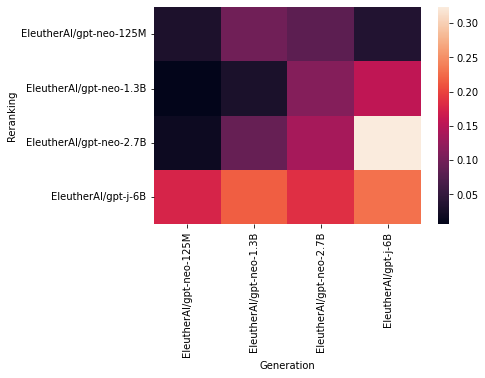

In [8]:
import seaborn as sns

ax = sns.heatmap(top_prompts_heatmap)
ax.set(xlabel='Generation', ylabel='Reranking')